<h1 align="center"> Anamoly Detection</h1>
<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6ukEnXcTAKkZ8wZsW4qmpRQ73m8_yJIXQUA&usqp=CAU" width="60%" >

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score
import warnings
warnings.simplefilter(action='ignore')

import Dataset

In [2]:
# data
df=pd.read_csv('./dataset/Anamoly.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


## 1.  Data Visualization and Exploration

check no of rows and columns

In [3]:
df.shape

(22544, 40)

details about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   hot                          22544 non-null  int64  
 9   num_failed_logins            22544 non-null  int64  
 10  logged_in                    22544 non-null  int64  
 11  num_compromised              22544 non-null  int64  
 12  root_shell                   22544 non-null  int64  
 13  su_attempted    

1. Print 2 rows for sanity check to identify all the features present in the dataset 
and if the target matches with them.

In [5]:
#display all the column
pd.set_option('display.max_columns', None)
df.head(2)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255.0,10.0,0.04,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255.0,1.0,0.00,0.06,0.0,0.0,0.0,0.0,1.0,1.0,anomaly


***Check Class Balancing***

In [6]:
df['class'].value_counts()

anomaly    12833
normal      9711
Name: class, dtype: int64

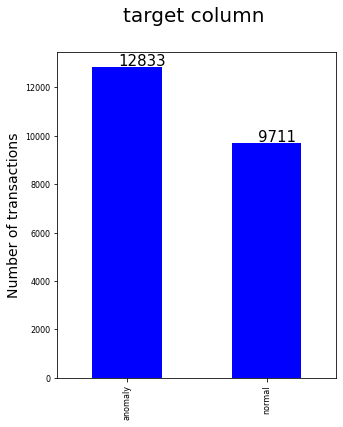

In [7]:
ax = df["class"].value_counts().plot(kind='bar', figsize=(5, 6), fontsize=8, color='blue')
ax.set_title('target column ', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 70, str(round(i.get_height(), 2)), fontsize=15)

It appears that the data has a relatively good balance between the categories of the target column, and therefore we will not manipulate this is natural balance.

### Identify Highly Correlated Features

In [8]:
pear_corr=df.corr(method='pearson')
pear_corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.002673,0.078951,-0.002741,-0.009193,-0.004688,-0.021159,-0.075685,0.095383,0.019846,0.088308,0.095269,0.000537,0.001630,0.022909,NaN,0.000076,-0.090544,-0.046632,-0.021690,-0.026958,-0.039459,-0.035447,0.095709,-0.050109,-0.038697,0.060634,0.010055,0.004985,0.016746,-0.052325,-0.024126,0.093246,0.107698,-0.029375,-0.055959
src_bytes,0.002673,1.000000,0.053634,-0.000388,-0.001247,0.002631,-0.003127,-0.009632,-0.000098,-0.000861,-0.000050,-0.000274,-0.000203,-0.000388,-0.001021,NaN,-0.003705,-0.012451,-0.006029,-0.007239,-0.007224,-0.005738,-0.005587,0.013744,-0.007687,-0.006796,-0.009422,-0.014245,-0.006796,-0.002920,0.008955,0.004873,-0.007699,-0.007494,-0.010351,-0.009956
dst_bytes,0.078951,0.053634,1.000000,-0.001708,-0.005726,0.027913,-0.011167,0.091598,0.089808,0.054135,0.071767,0.088287,0.004721,0.011365,0.038296,NaN,-0.011879,-0.055426,-0.025510,-0.019685,-0.019924,-0.053452,-0.052848,0.059869,-0.031762,-0.004087,-0.055146,0.037882,0.041176,-0.030930,-0.019014,0.002876,-0.030166,-0.020413,-0.054114,-0.051588
land,-0.002741,-0.000388,-0.001708,1.000000,-0.001042,-0.002001,-0.002538,-0.015692,-0.000291,-0.000872,-0.000223,-0.000251,-0.000228,-0.000423,-0.000922,NaN,-0.003015,-0.010699,-0.005763,0.053528,0.052954,-0.010100,-0.009958,0.011094,-0.006398,0.052761,-0.021747,-0.021656,-0.001277,-0.005176,0.025519,0.090885,0.035814,0.042376,-0.010492,-0.009966
wrong_fragment,-0.009193,-0.001247,-0.005726,-0.001042,1.000000,-0.006710,-0.008511,-0.052625,-0.000975,-0.002923,-0.000747,-0.000843,-0.000763,-0.001420,-0.003092,NaN,-0.010111,-0.019795,0.003508,-0.020596,-0.020532,-0.033871,-0.033397,0.037205,-0.021457,0.008955,-0.041473,-0.050800,-0.015477,0.001490,0.070613,0.061633,-0.009629,-0.020849,-0.023886,-0.033422
hot,-0.004688,0.002631,0.027913,-0.002001,-0.006710,1.000000,-0.000137,0.122304,0.024989,0.140628,0.005372,0.022528,0.726828,0.048024,0.052526,NaN,0.365492,-0.068139,-0.035471,-0.037202,-0.037327,-0.056655,-0.057126,0.068183,-0.033184,-0.025872,-0.003868,-0.041744,-0.029866,0.016772,-0.033412,-0.010385,-0.025538,-0.036631,-0.035848,-0.058160
num_failed_logins,-0.021159,-0.003127,-0.011167,-0.002538,-0.008511,-0.000137,1.000000,-0.122271,-0.000873,-0.001140,-0.001820,-0.000879,0.004244,-0.003459,0.014218,NaN,0.145802,-0.087243,-0.048459,-0.046183,-0.046067,-0.064206,-0.063054,0.090288,-0.051138,-0.054558,0.049442,-0.007143,-0.009534,-0.038990,-0.060067,-0.029661,-0.049818,-0.048367,-0.079955,-0.066030
logged_in,-0.075685,-0.009632,0.091598,-0.015692,-0.052625,0.122304,-0.122271,1.000000,0.018524,0.055542,0.014194,0.016015,0.014501,0.026978,0.058760,NaN,0.140010,-0.488059,-0.202445,-0.298186,-0.297481,-0.367809,-0.365206,0.529847,-0.243108,0.071165,-0.313105,0.581969,0.565930,-0.266702,-0.264048,-0.037231,-0.296553,-0.305612,-0.397730,-0.428453
num_compromised,0.095383,-0.000098,0.089808,-0.000291,-0.000975,0.024989,-0.000873,0.018524,1.000000,0.284041,0.817746,0.995960,0.011895,0.048406,0.285937,NaN,-0.002711,-0.009968,-0.005401,-0.005713,-0.005700,-0.009123,-0.009043,0.010382,-0.005988,-0.005412,-0.021682,-0.014779,-0.009773,0.000075,-0.003586,-0.001461,-0.004815,-0.004122,-0.009273,-0.008039
root_shell,0.019846,-0.000861,0.054135,-0.000872,-0.002923,0.140628,-0.001140,0.055542,0.284041,1.000000,0.212853,0.283976,0.061800,0.335902,0.275797,NaN,-0.008460,-0.029734,-0.016021,-0.017233,-0.017180,-0.028341,-0.027944,0.031130,-0.017953,-0.016831,-0.025149,-

<AxesSubplot:>

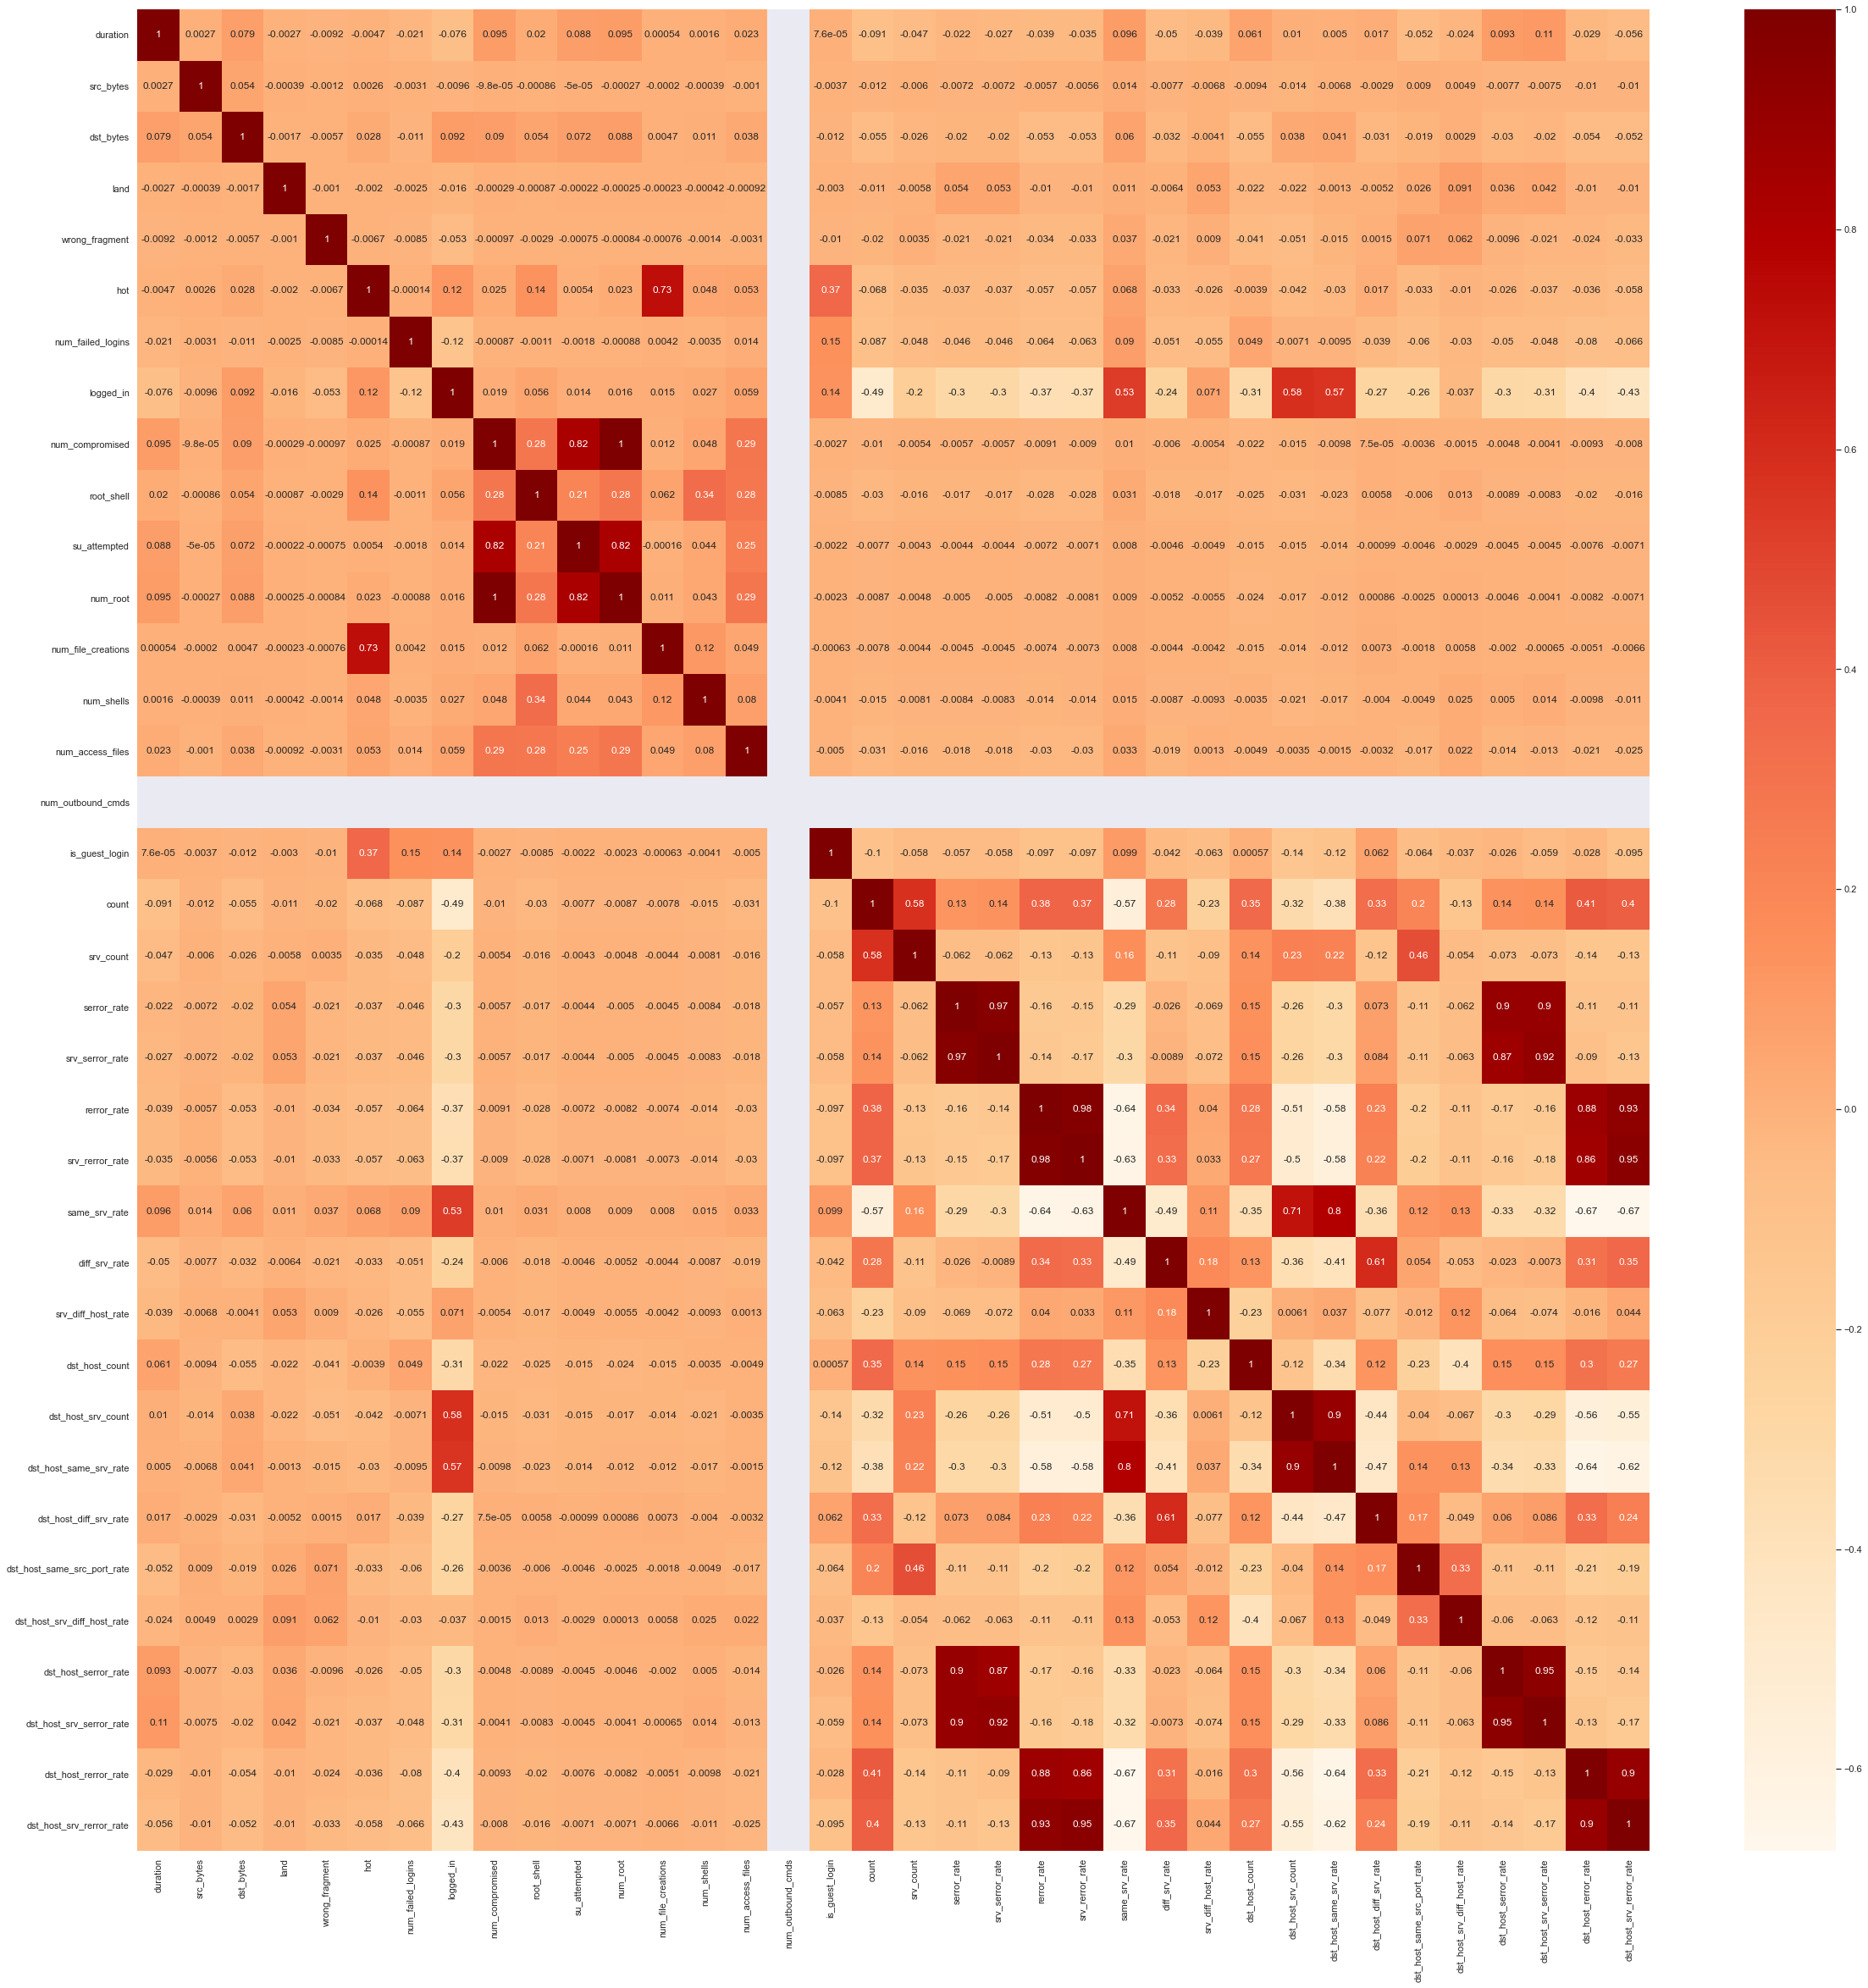

In [9]:
sns.set(rc={'figure.figsize':(40,40)})
sns.heatmap(pear_corr, cmap="OrRd", annot=True)

In [10]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [11]:
to_drop

['num_root', 'srv_serror_rate', 'srv_rerror_rate']

***Drop Marked Features***

If we add so much correlated features to the model we may cause the model to consider unnecessary features and we may have curse of high dimensionality problem

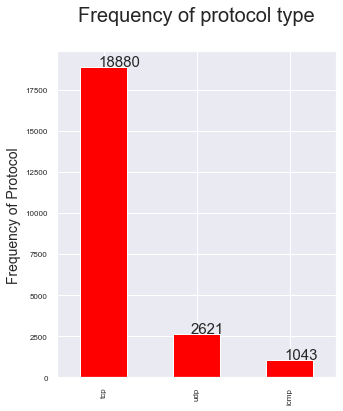

In [12]:
ax = df["protocol_type"].value_counts().plot(kind='bar', figsize=(5, 6), fontsize=8, color='red')
ax.set_title('Frequency of protocol type', size=20, pad=30)
ax.set_ylabel('Frequency of Protocol', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 70, str(round(i.get_height(), 2)), fontsize=15)

***TCP protocol type is highest in dataset***

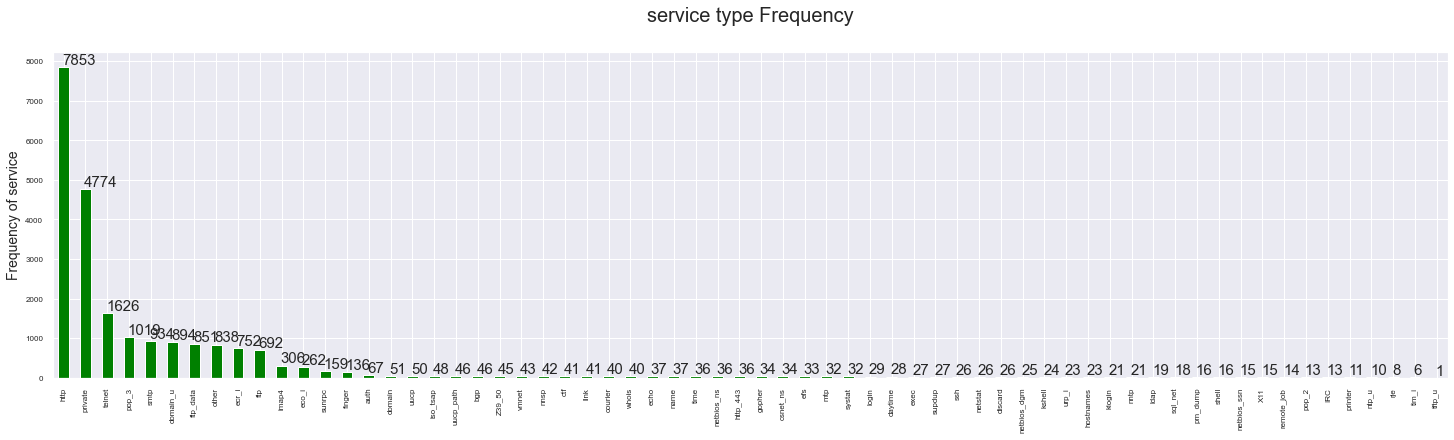

In [13]:
ax = df["service"].value_counts().plot(kind='bar', figsize=(25, 6), fontsize=8, color='green')
ax.set_title('service type Frequency', size=20, pad=30)
ax.set_ylabel('Frequency of service', fontsize=14)
for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 70, str(round(i.get_height(), 2)), fontsize=15)

***http is highest service type followed by private & telnet***

#2.Data pre-processing and cleaning 

let's check the Duplicate value

In [14]:
df.duplicated().sum()

3

In [15]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
10256,0,tcp,other,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,482,1,0.05,0.0,0.95,1.0,0.0,1.0,0.0,255.0,1.0,0.0,1.0,0.0,0.0,0.07,0.0,0.93,1.0,anomaly
10619,0,tcp,other,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,509,1,0.05,0.0,0.95,1.0,0.0,1.0,0.0,255.0,1.0,0.0,1.0,0.0,0.0,0.03,0.0,0.97,1.0,anomaly
15044,0,tcp,other,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,487,1,0.04,0.0,0.96,1.0,0.0,1.0,0.0,255.0,1.0,0.0,1.0,0.0,0.0,0.02,0.0,0.98,1.0,anomaly


we have few duplicate value let's get rid of that

In [16]:
# dropping ALL duplicate values
df.drop_duplicates(keep = 'first', inplace = True)

In [17]:
#remaining data after removel of duplicates
df.shape

(22541, 40)

***Lets check missing value***

<AxesSubplot:>

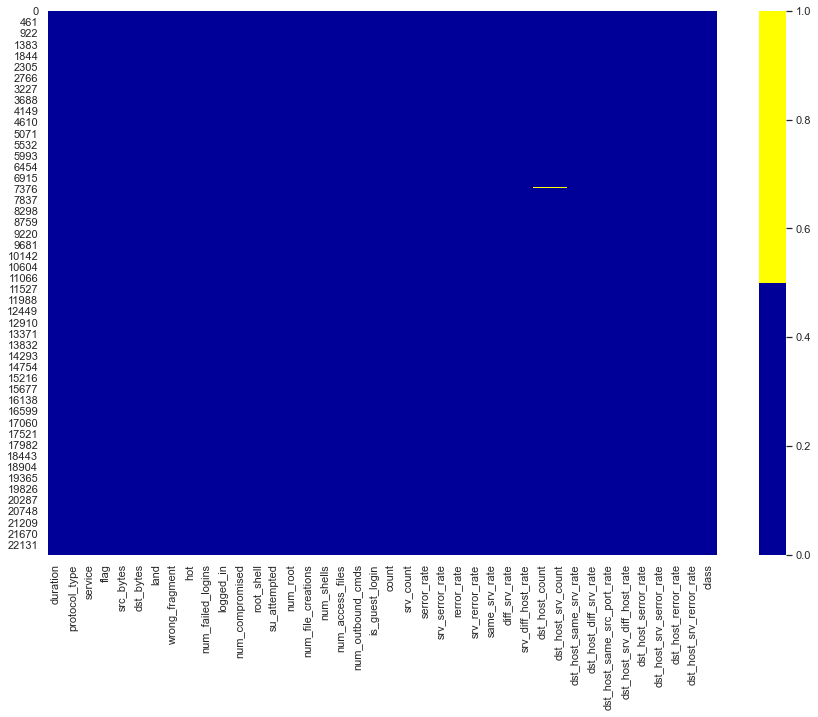

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
cols =df.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

We have few missing value for dst_host_count, dst_host_srv_count let's check how many

In [19]:
df.isnull().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
num_outbound_cmds               0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count

In [20]:
# Here I calculate the percentage of missing data in each column.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

duration - 0%
protocol_type - 0%
service - 0%
flag - 0%
src_bytes - 0%
dst_bytes - 0%
land - 0%
wrong_fragment - 0%
hot - 0%
num_failed_logins - 0%
logged_in - 0%
num_compromised - 0%
root_shell - 0%
su_attempted - 0%
num_root - 0%
num_file_creations - 0%
num_shells - 0%
num_access_files - 0%
num_outbound_cmds - 0%
is_guest_login - 0%
count - 0%
srv_count - 0%
serror_rate - 0%
srv_serror_rate - 0%
rerror_rate - 0%
srv_rerror_rate - 0%
same_srv_rate - 0%
diff_srv_rate - 0%
srv_diff_host_rate - 0%
dst_host_count - 0%
dst_host_srv_count - 0%
dst_host_same_srv_rate - 0%
dst_host_diff_srv_rate - 0%
dst_host_same_src_port_rate - 0%
dst_host_srv_diff_host_rate - 0%
dst_host_serror_rate - 0%
dst_host_srv_serror_rate - 0%
dst_host_rerror_rate - 0%
dst_host_srv_rerror_rate - 0%
class - 0%


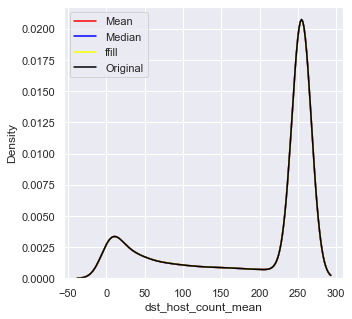

In [21]:
data_2=df.copy()
dst_host_count_mean = data_2['dst_host_count'].mean()
dst_host_count_median = data_2['dst_host_count'].median()
data_2['dst_host_count_mean'] = data_2.dst_host_count.fillna(dst_host_count_mean)
data_2['dst_host_count_median'] = data_2.dst_host_count.fillna(dst_host_count_median)
data_2['new_dst_host_count'] = data_2['dst_host_count'].fillna(method="ffill")
#Now let's draw the new columns
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(data_2['dst_host_count_mean'],color='red',label='Mean')
sns.kdeplot(data_2['dst_host_count_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_dst_host_count'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['dst_host_count'],color='black',label='Original')
plt.legend()

**We have used 3 techniques to compensate for the missing values and we noticed that all are techniques have same distribution curve on the original distribution curve.**

**Therefore, we can select anyone that is best suited for this column and therefore we will use it in the original data.**

In [22]:
df['dst_host_count']=data_2['dst_host_count_mean']

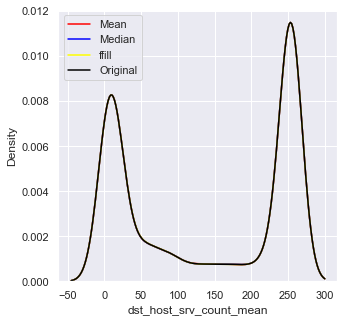

In [23]:
data_2=df.copy()
dst_host_srv_count_mean = data_2['dst_host_srv_count'].mean()
dst_host_srv_count_median = data_2['dst_host_srv_count'].median()
data_2['dst_host_srv_count_mean'] = data_2.dst_host_srv_count.fillna(dst_host_srv_count_mean)
data_2['dst_host_srv_count_median'] = data_2.dst_host_srv_count.fillna(dst_host_srv_count_median)
data_2['new_dst_host_srv_count'] = data_2['dst_host_srv_count'].fillna(method="ffill")
#Now let's draw the new columns
sns.set(rc={'figure.figsize':(5,5)})
sns.kdeplot(data_2['dst_host_srv_count_mean'],color='red',label='Mean')
sns.kdeplot(data_2['dst_host_srv_count_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_dst_host_srv_count'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['dst_host_srv_count'],color='black',label='Original')
plt.legend()

**We have used 3 techniques to compensate for the missing values and we noticed that all are techniques have same distribution curve on the original distribution curve.**

**Therefore, we can select anyone that is best suited for this column and therefore we will use it in the original data.**

In [24]:
df['dst_host_srv_count']=data_2['dst_host_srv_count_mean']

---
---

# Get rid of outliers

**We will isolate the numeric columns from the non-numeric columns in order to look for outliers.**

In [25]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['duration' 'src_bytes' 'dst_bytes' 'land' 'wrong_fragment' 'hot'
 'num_failed_logins' 'logged_in' 'num_compromised' 'root_shell'
 'su_attempted' 'num_root' 'num_file_creations' 'num_shells'
 'num_access_files' 'num_outbound_cmds' 'is_guest_login' 'count'
 'srv_count' 'serror_rate' 'srv_serror_rate' 'rerror_rate'
 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate' 'srv_diff_host_rate'
 'dst_host_count' 'dst_host_srv_count' 'dst_host_same_srv_rate'
 'dst_host_diff_srv_rate' 'dst_host_same_src_port_rate'
 'dst_host_srv_diff_host_rate' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate']


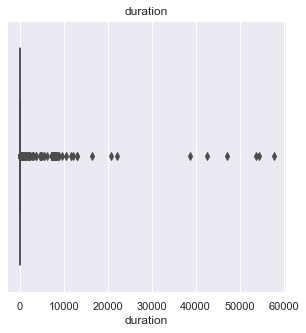

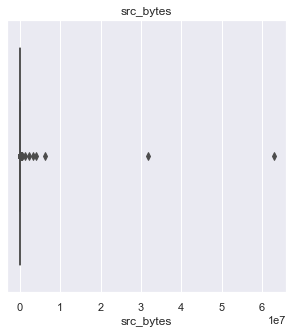

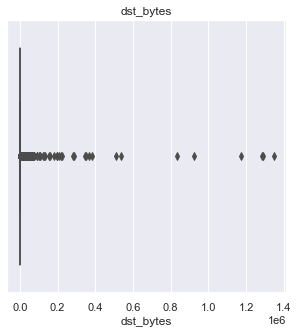

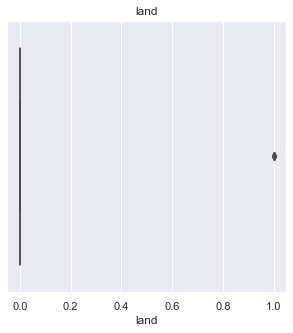

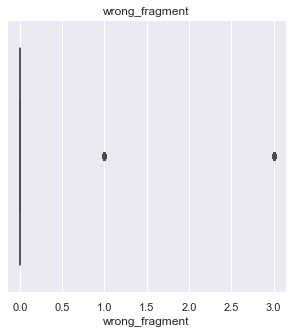

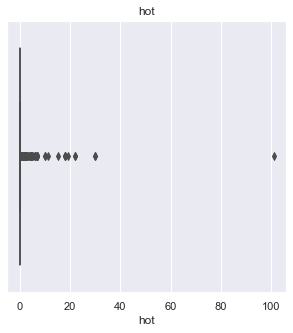

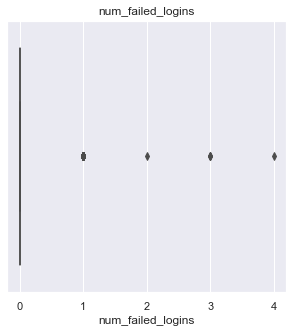

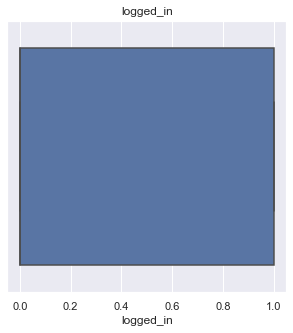

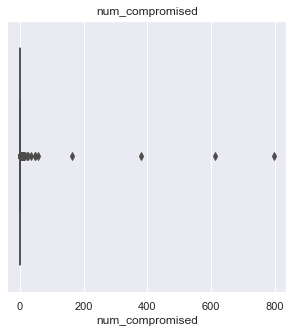

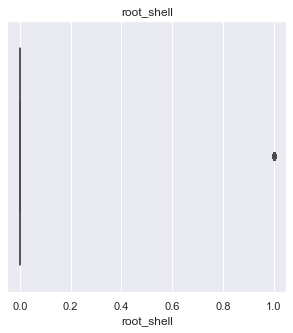

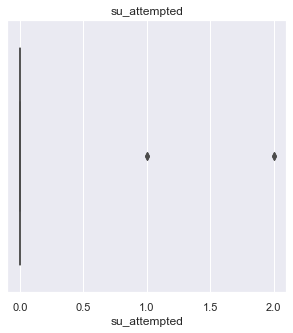

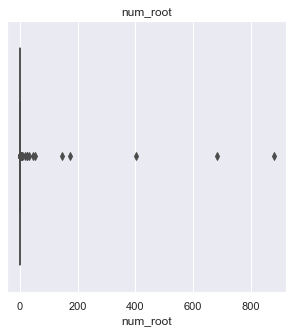

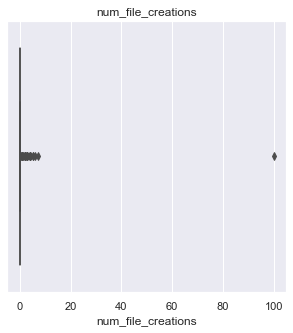

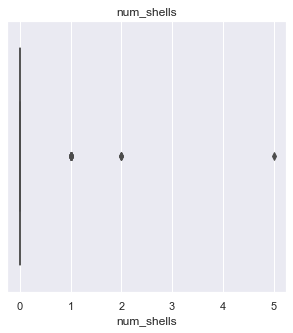

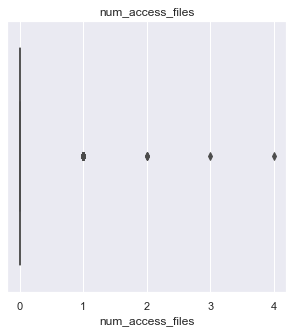

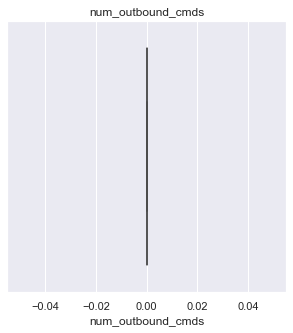

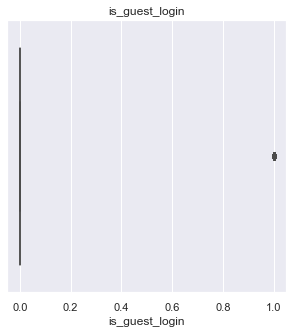

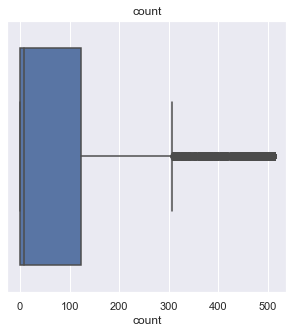

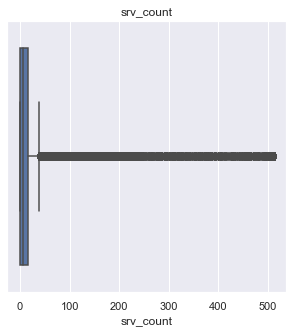

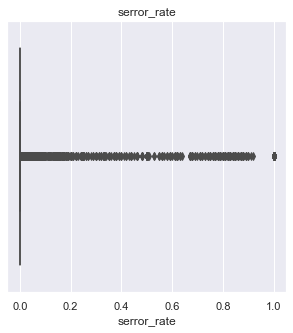

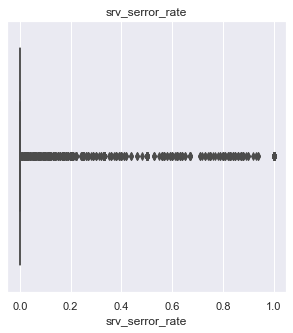

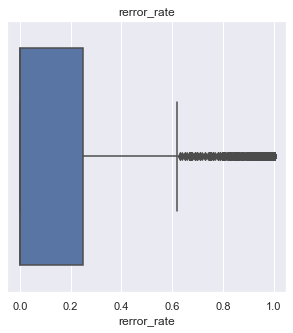

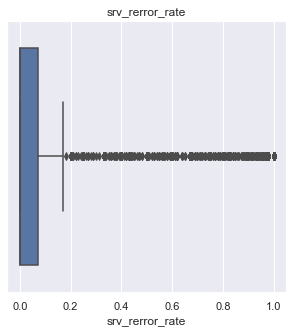

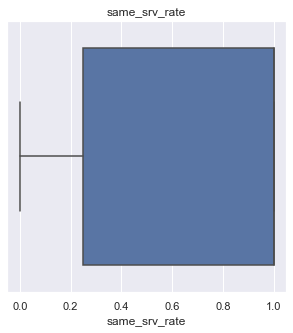

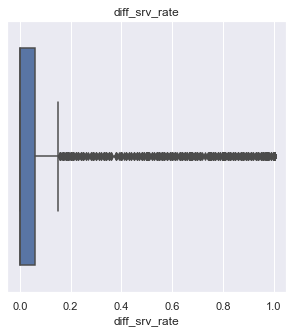

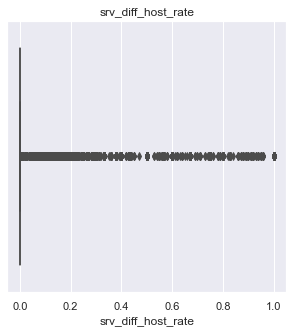

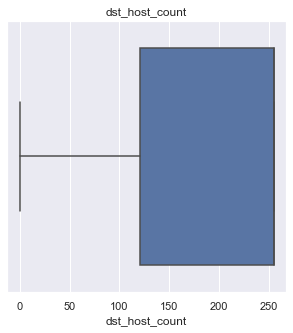

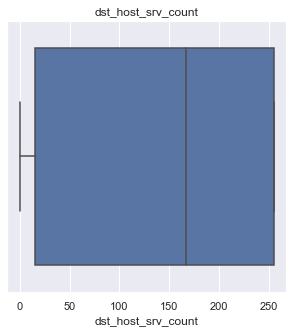

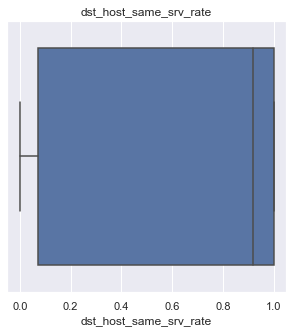

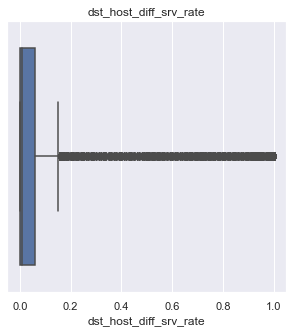

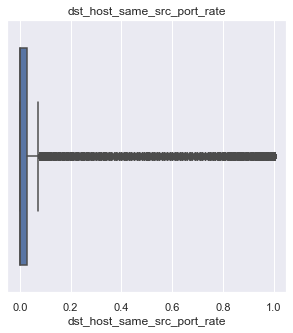

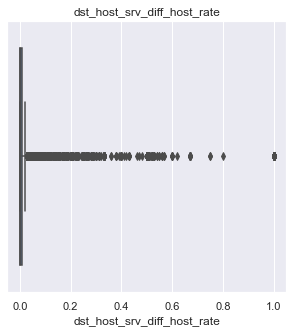

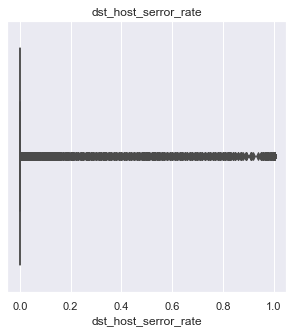

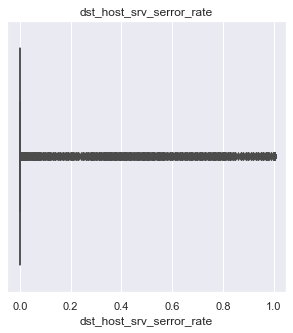

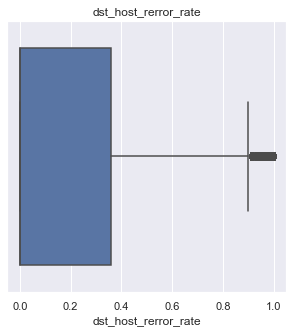

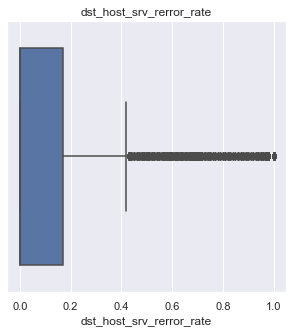

In [26]:
# dealing with outliers values
for i in df_numeric.columns:
    sns.boxplot(df_numeric[i])
    plt.title(i)
    plt.show()

**Through the schematics that we fortified, we notice the presence of extreme values,
Outliers work to affect the algorithms that we will build negatively because the difference between the lowest value and the largest value in each column is a large difference and thus a dispersion of the model occurs.**

**But we know very well that the decision to get rid of outliers is a decision that must be a well-thought-out decision, and in most cases we consult specialists in the case of these data, we have to consult a specialist in the Telecome field, specifically.**

**But that process is not currently available to us because we are working on ready data, so we will leave that step as it is and move on to the next step.**

In [27]:
df=df.dropna()

#data splitting

In [28]:
# Here we perform an initial separation of the data, specifically the target column from the rest of the columns.
target=df["class"]
features=df.drop(["class"],axis=1)

#data transformation

In [29]:

# Here we made a transformation of the target column.
object_1=LabelEncoder()
y=object_1.fit_transform(target)

In [30]:
# Here we do a conversion of categorical columns from the data
object_1=LabelEncoder()
# During the conversion process, we used the first projection.
for i in features.select_dtypes(exclude=[np.number]).columns:
    features[i] = object_1.fit_transform(df[i])

As protocol_type, service,flag are of type text we used labelEncoder 

#data scalling

Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, hereitis  between zero and one.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)

MinMaxScaler()

In [32]:
new_features = scaler.transform(features)
print(new_features)

[[0.00000000e+00 5.00000000e-01 7.14285714e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.00000000e-01 7.14285714e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [3.46530365e-05 5.00000000e-01 3.01587302e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 5.00000000e-01 3.49206349e-01 ... 0.00000000e+00
  7.00000000e-02 7.00000000e-02]
 [0.00000000e+00 1.00000000e+00 1.74603175e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 8.25396825e-01 ... 0.00000000e+00
  4.40000000e-01 1.00000000e+00]]


In [33]:
print(new_features.shape)

(22541, 39)


 ## 3.Model Building

**Split the dataset into training and test sets.**

data splitting is typically done to avoid overfitting/underfitting. That is an instance where a machine learning model fits its training data too well and fails to reliably fit additional data. 

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

*** Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ;
[ x_test1,y_test1] = 20% ;***


In [34]:
# Complete the data separation. 

x_train1,x_test1,y_train1,y_test1=train_test_split(new_features,y,test_size=0.2,random_state=0)

In [35]:
print(x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape)

(18032, 39) (4509, 39) (18032,) (4509,)


***Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ;
[ x_test2,y_test2] = 90%***

In [36]:
# Complete the data separation. 
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(new_features,y,test_size=0.9,random_state=0)

In [37]:
print(x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape)

(2254, 39) (20287, 39) (2254,) (20287,)


#GaussianNB

##Case1

Set parameter for Cross Validation 

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

**We used Grid Search :**
Grid Search cross-validation is a technique to select the best of the machine learning model, parameterized by a grid of hyperparameters.

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

np.random.seed(999)

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

#Data_transformed = PowerTransformer().fit_transform(Data)

gs_NB.fit(x_train1, y_train1)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [40]:
gs_NB.best_params_

{'var_smoothing': 0.0001232846739442066}

In [41]:
gs_NB.best_score_

0.8437403739765066

Let's define a new data frame to store the NB grid search results for visualization.

In [42]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

Now let's do the plotting with respect to the var_smoothing parameter.

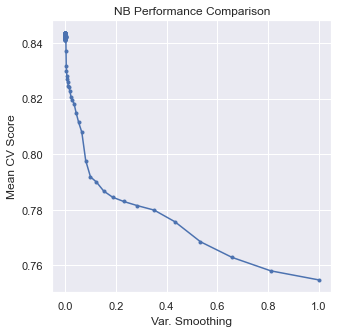

In [43]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

***We observe that the best variance smoothing parameter for NB is around 0.1, though the difference between other values in terms of the mean CV score is very small per the range of the y-axis.***

In [44]:
GaussianNB_model=GaussianNB(var_smoothing=0.0001232846739442066)
GaussianNB_model=GaussianNB_model.fit(x_train1, y_train1)

In [45]:
from sklearn.metrics import roc_curve, auc, accuracy_score,confusion_matrix
y_train_pred=GaussianNB_model.predict(x_train1)
print(accuracy_score(y_train_pred,y_train1))
ytrain = np.array(y_train1)
cf_matrix = confusion_matrix(ytrain, y_train_pred)
print(cf_matrix)

0.8437222715173026
[[7880 2417]
 [ 401 7334]]


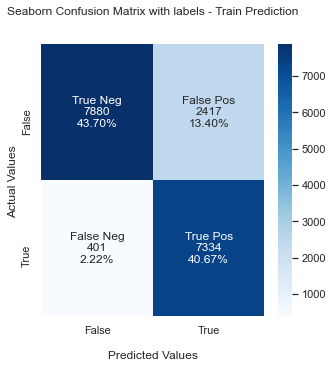

In [46]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [47]:
# Predicting test results
y_test_pred = GaussianNB_model.predict(x_test1)
ytest = np.array(y_test1)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(accuracy_score(y_test_pred,y_test1))
print(cf_matrix_test)

0.8383233532934131
[[1921  612]
 [ 117 1859]]


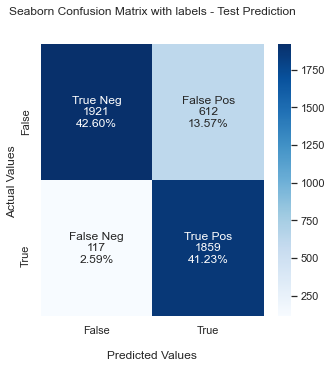

In [48]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

***classification report***

In [49]:
print(classification_report(y_test1, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      2533
           1       0.75      0.94      0.84      1976

    accuracy                           0.84      4509
   macro avg       0.85      0.85      0.84      4509
weighted avg       0.86      0.84      0.84      4509



## case-2

In [50]:
gs_NB.fit(x_train2, y_train2)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [51]:
gs_NB.best_params_

{'var_smoothing': 0.0003511191734215131}

In [52]:
gs_NB.best_score_

0.845750184774575

Let's define a new data frame to store the NB grid search results for visualization.

In [53]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

Now let's do the plotting with respect to the var_smoothing parameter.

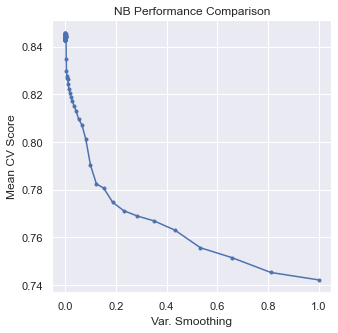

In [54]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

We observe that the best variance smoothing parameter for NB is around 0.1, though the difference between other values in terms of the mean CV score is very small per the range of the y-axis.

In [55]:
GaussianNB_modelcase2=GaussianNB(var_smoothing=0.0003511191734215131)
GaussianNB_model2=GaussianNB_modelcase2.fit(x_train2, y_train2)

In [56]:
from sklearn.metrics import roc_curve, auc, accuracy_score,confusion_matrix
y_train_pred=GaussianNB_model2.predict(x_train2)
print(accuracy_score(y_train_pred,y_train2))
# Predicting test results
y_pred = GaussianNB_model.predict(x_train2)
ytrain = np.array(y_train2)
cf_matrix = confusion_matrix(ytrain, y_pred)
print(cf_matrix)

0.8464951197870453
[[1021  299]
 [  44  890]]


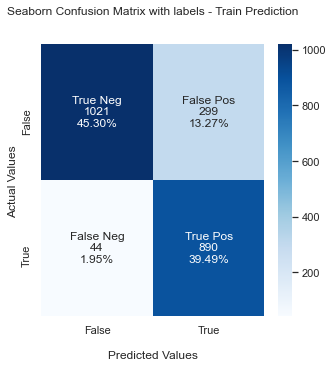

In [57]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [58]:
# Predicting test results
y_test_pred=GaussianNB_model2.predict(x_test2)
ytest = np.array(y_test2)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(accuracy_score(y_test_pred,y_test2))
print(cf_matrix_test)

0.8422635185093903
[[8792 2718]
 [ 482 8295]]


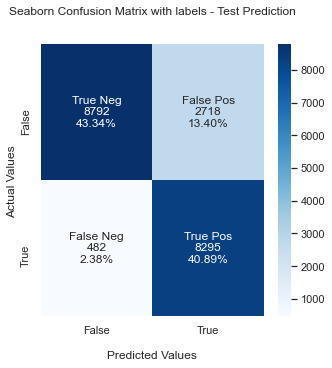

In [59]:
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

***classification report***

In [60]:
print(classification_report(y_test2, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85     11510
           1       0.75      0.95      0.84      8777

    accuracy                           0.84     20287
   macro avg       0.85      0.85      0.84     20287
weighted avg       0.86      0.84      0.84     20287



##With Regularization

In [61]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
reg_df=df.copy()
# Drop features 
reg_df.drop(df[to_drop], axis=1)
reg_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255.0,10.0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255.0,1.0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134.0,86.0,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3.0,57.0,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29.0,86.0,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


If we add so much correlated features to the model we may cause the model to consider unnecessary features and we may have curse of high dimensionality problem it also increase the model training time 

In [62]:
reg_df=reg_df.dropna()
# Complete the data separation. 
# Here we perform an initial separation of the data, specifically the target column from the rest of the columns.
target_R=reg_df["class"]
features_R=reg_df.drop(["class"],axis=1)
# Here I made a transformation of the target column.
object_1=LabelEncoder()
y_=object_1.fit_transform(target_R)
# Here I do a conversion of categorical columns from the data
# During the conversion process, we used the first projection.
for i in features_R.select_dtypes(exclude=[np.number]).columns:
    features_R[i] = object_1.fit_transform(reg_df[i])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features_R)
new_featuresR = scaler.transform(features_R)
print(new_featuresR)
#case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1,y_test1] = 20% ;
x_train3,x_test3,y_train3,y_test3=train_test_split(new_featuresR,y_,test_size=0.2,random_state=0)
#case 2 : Train = 10 % Test = 90% [ x_train1,y_train1] = 10% ; [ x_test1,y_test1] = 90% ;
x_train4,x_test4,y_train4,y_test4=train_test_split(new_featuresR,y_,test_size=0.9,random_state=0)

[[0.00000000e+00 5.00000000e-01 7.14285714e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.00000000e-01 7.14285714e-01 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [3.46530365e-05 5.00000000e-01 3.01587302e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 5.00000000e-01 3.49206349e-01 ... 0.00000000e+00
  7.00000000e-02 7.00000000e-02]
 [0.00000000e+00 1.00000000e+00 1.74603175e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.00000000e-01 8.25396825e-01 ... 0.00000000e+00
  4.40000000e-01 1.00000000e+00]]


### Case-1

In [63]:
gs_NB.fit(x_train3, y_train3)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [64]:
gs_NB.best_params_

{'var_smoothing': 0.0001232846739442066}

In [65]:
gs_NB.best_score_

0.8437403739765066

Let's define a new data frame to store the NB grid search results for visualization.

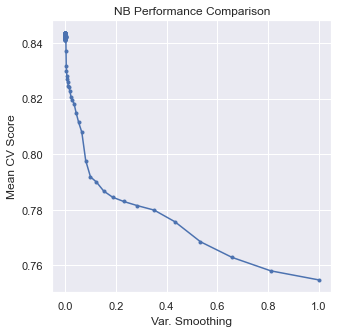

In [66]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

0.8437222715173026
[[7880 2417]
 [ 401 7334]]


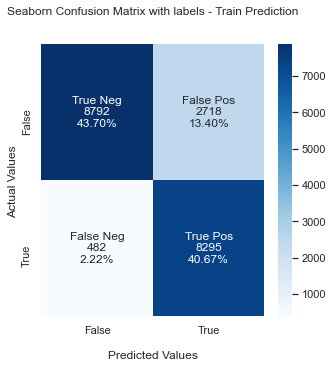

In [67]:
GaussianNB_model=GaussianNB(var_smoothing=0.0001232846739442066)
GaussianNB_model=GaussianNB_model.fit(x_train3, y_train3)
y_train_pred=GaussianNB_model.predict(x_train3)
print(accuracy_score(y_train_pred,y_train3))
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]
ytest = np.array(y_train3)
cf_matrix_test = confusion_matrix(ytest, y_train_pred)
print(cf_matrix_test)

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

0.8383233532934131
[[1921  612]
 [ 117 1859]]


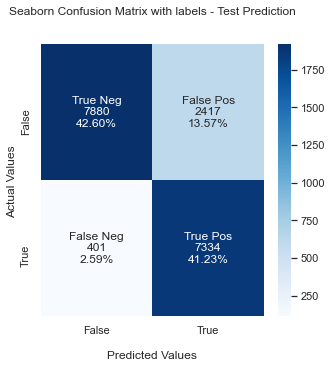

In [68]:
y_test_pred=GaussianNB_model.predict(x_test3)
print(accuracy_score(y_test_pred,y_test3))
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]
ytest = np.array(y_test3)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(cf_matrix_test)

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

***classification report***

In [69]:
print(classification_report(y_test3, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      2533
           1       0.75      0.94      0.84      1976

    accuracy                           0.84      4509
   macro avg       0.85      0.85      0.84      4509
weighted avg       0.86      0.84      0.84      4509



### Case-2

In [70]:
gs_NB.fit(x_train4, y_train4)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [71]:
print('best parameter {} - best Score {}%'.format(gs_NB.best_params_, gs_NB.best_score_))

best parameter {'var_smoothing': 0.0003511191734215131} - best Score 0.845750184774575%


0.8464951197870453
[[1016  304]
 [  42  892]]


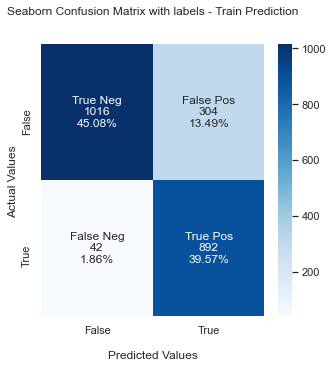

In [72]:
GaussianNB_model_case2=GaussianNB(var_smoothing=0.0003511191734215131)
GaussianNB_model_case2=GaussianNB_model_case2.fit(x_train4, y_train4)
y_train_pred=GaussianNB_model_case2.predict(x_train4)
print(accuracy_score(y_train_pred,y_train4))
ytest = np.array(y_train4)
cf_matrix_test = confusion_matrix(ytest, y_train_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

0.8422635185093903
[[8792 2718]
 [ 482 8295]]


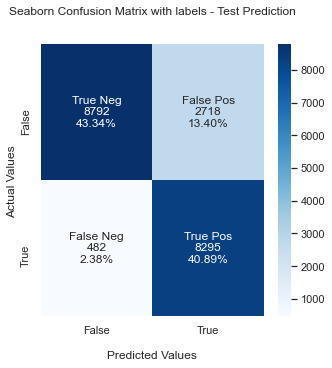

In [73]:
y_test_pred=GaussianNB_model_case2.predict(x_test4)
print(accuracy_score(y_test_pred,y_test4))
ytest = np.array(y_test4)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

***classification report***

In [74]:
print(classification_report(y_test4, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85     11510
           1       0.75      0.95      0.84      8777

    accuracy                           0.84     20287
   macro avg       0.85      0.85      0.84     20287
weighted avg       0.86      0.84      0.84     20287



# BernoulliNB

In [75]:
from sklearn.naive_bayes import BernoulliNB
## Define the dictionary for the grid search and the model object to search on
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
## Define the NB regression model
NB_clf = BernoulliNB() 

## Perform the grid search over the parameters
Bn_NB = GridSearchCV(estimator=NB_clf, 
                     param_grid=param_grid, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

### Case-1

In [76]:
Bn_NB.fit(x_train1, y_train1)
print('Best alpha',Bn_NB.best_estimator_.alpha)
print('Best Accuracy',Bn_NB.best_score_)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best alpha 0.0001
Best Accuracy 0.8522622939526749


0.853427240461402
[[8179 2118]
 [ 525 7210]]


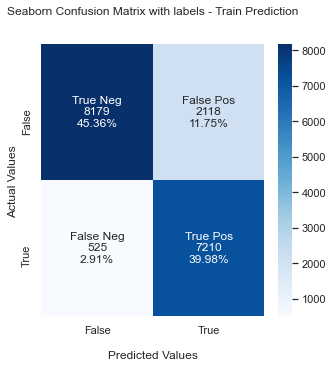

In [77]:
BernoulliNB_model=BernoulliNB(alpha=0.0001)
BernoulliNB_model=BernoulliNB_model.fit(x_train1, y_train1)
y_train_pred=BernoulliNB_model.predict(x_train1)
print(accuracy_score(y_train_pred,y_train1))
ytest = np.array(y_train1)
cf_matrix_test = confusion_matrix(ytest, y_train_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

test data

0.8591705477933023
[[2023  510]
 [ 125 1851]]


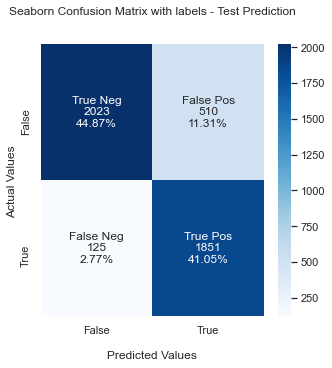

In [78]:
y_test_pred=BernoulliNB_model.predict(x_test1)
print(accuracy_score(y_test_pred,y_test1))
ytest = np.array(y_test1)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

***classification report***

In [79]:
print(classification_report(y_test1, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2533
           1       0.78      0.94      0.85      1976

    accuracy                           0.86      4509
   macro avg       0.86      0.87      0.86      4509
weighted avg       0.87      0.86      0.86      4509



### Case-2

In [80]:
Bn_NB.fit(x_train2, y_train2)
print('Best alpha',Bn_NB.best_estimator_.alpha)
print('Best Accuracy',Bn_NB.best_score_)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best alpha 0.0001
Best Accuracy 0.8544738441323807


0.8509316770186336
[[1047  273]
 [  63  871]]


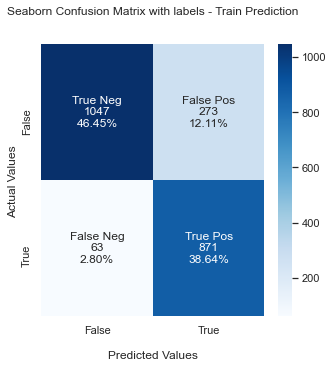

In [81]:
BernoulliNB_model_case2=BernoulliNB(alpha=0.0001)
BernoulliNB_model_case2=BernoulliNB_model_case2.fit(x_train2, y_train2)
y_train_pred=BernoulliNB_model_case2.predict(x_train2)
print(accuracy_score(y_train_pred,y_train2))
ytest = np.array(y_train2)
cf_matrix_test = confusion_matrix(ytest, y_train_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

case 2 test data prediction

0.8553753635332972
[[9179 2331]
 [ 603 8174]]


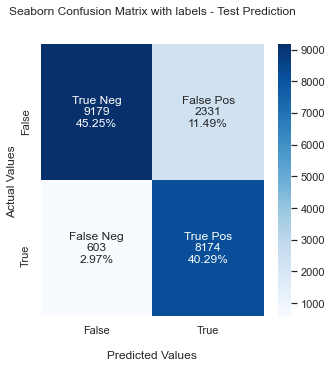

In [82]:
y_test_pred=BernoulliNB_model_case2.predict(x_test2)
print(accuracy_score(y_test_pred,y_test2))
ytest = np.array(y_test2)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

***classification report***

In [83]:
print(classification_report(y_test2, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     11510
           1       0.78      0.93      0.85      8777

    accuracy                           0.86     20287
   macro avg       0.86      0.86      0.86     20287
weighted avg       0.87      0.86      0.86     20287



##With Regularization

### case-1

In [84]:
Bn_NB.fit(x_train3, y_train3)
print('Best alpha',Bn_NB.best_estimator_.alpha)
print('Best Accuracy',Bn_NB.best_score_)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best alpha 0.0001
Best Accuracy 0.8522622939526749


let's train the model on train data on best parameter and plot the confusion matrix

0.853427240461402
[[8179 2118]
 [ 525 7210]]


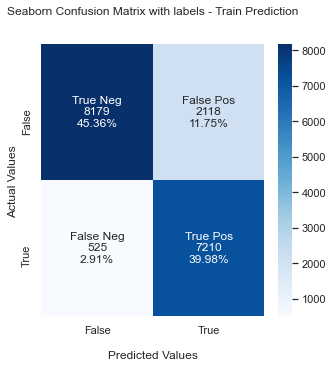

In [85]:
BernoulliNB_model=BernoulliNB(alpha=0.0001)
BernoulliNB_model=BernoulliNB_model.fit(x_train3, y_train3)
y_train_pred=BernoulliNB_model.predict(x_train3)
print(accuracy_score(y_train_pred,y_train3))
ytest = np.array(y_train3)
cf_matrix_test = confusion_matrix(ytest, y_train_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

0.8591705477933023
[[2023  510]
 [ 125 1851]]


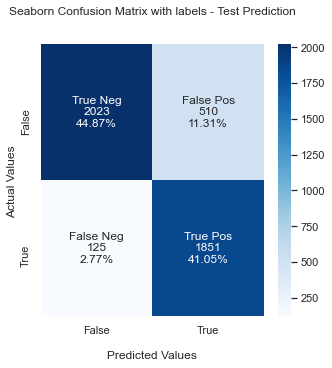

In [86]:
y_test_pred=BernoulliNB_model.predict(x_test3)
print(accuracy_score(y_test_pred,y_test3))
ytest = np.array(y_test3)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

***classification report***

In [87]:
print(classification_report(y_test3, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2533
           1       0.78      0.94      0.85      1976

    accuracy                           0.86      4509
   macro avg       0.86      0.87      0.86      4509
weighted avg       0.87      0.86      0.86      4509



### case-2

In [88]:
Bn_NB.fit(x_train4, y_train4)
print('Best alpha',Bn_NB.best_estimator_.alpha)
print('Best Accuracy',Bn_NB.best_score_)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best alpha 0.0001
Best Accuracy 0.8544738441323807


0.8509316770186336
[[1047  273]
 [  63  871]]


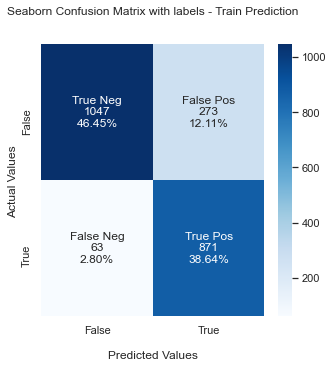

In [89]:
BernoulliNB_model_case2=BernoulliNB(alpha=0.0001)
BernoulliNB_model_case2=BernoulliNB_model_case2.fit(x_train4, y_train4)
y_train_pred=BernoulliNB_model_case2.predict(x_train4)
print(accuracy_score(y_train_pred,y_train4))
ytest = np.array(y_train4)
cf_matrix_test = confusion_matrix(ytest, y_train_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

0.8549810223295706
[[9157 2353]
 [ 589 8188]]


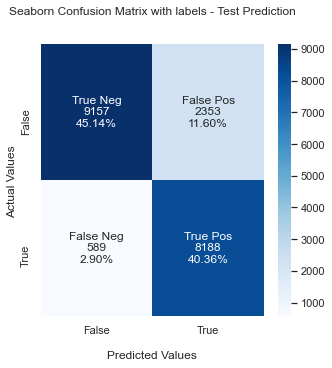

In [90]:
y_test_pred=BernoulliNB_model.predict(x_test4)
print(accuracy_score(y_test_pred,y_test4))
ytest = np.array(y_test4)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

***classification report***

In [91]:
print(classification_report(y_test4, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     11510
           1       0.78      0.93      0.85      8777

    accuracy                           0.85     20287
   macro avg       0.86      0.86      0.85     20287
weighted avg       0.87      0.85      0.86     20287



# MultinomialNB

In [92]:
from sklearn.naive_bayes import MultinomialNB
## Define the dictionary for the grid search and the model object to search on
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
## Define the NB regression model
MN_clf = MultinomialNB() 

## Perform the grid search over the parameters
mn_NB = GridSearchCV(estimator=MN_clf, 
                     param_grid=param_grid, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

### Case-1

In [93]:
mn_NB.fit(x_train1, y_train1)
MN_NB_Case1_alpha = mn_NB.best_estimator_.alpha
print('Best alpha',mn_NB.best_estimator_.alpha)
print('Best Accuracy',mn_NB.best_score_)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best alpha 0.0001
Best Accuracy 0.8158640506281233


0.81627107364685
[[7284 3013]
 [ 300 7435]]


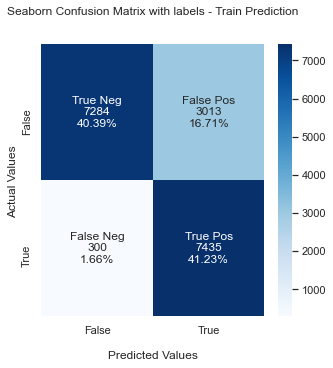

In [94]:
MultinomialNB_model=MultinomialNB(alpha=0.0001)
MultinomialNB_model=MultinomialNB_model.fit(x_train1, y_train1)
y_train_pred=MultinomialNB_model.predict(x_train1)
MN_NB_Case1_train = accuracy_score(y_train_pred,y_train1)
print(accuracy_score(y_train_pred,y_train1))
ytest = np.array(y_train1)
cf_matrix_test = confusion_matrix(ytest, y_train_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

Predict label of test data from best model

0.8143712574850299
[[1777  756]
 [  81 1895]]


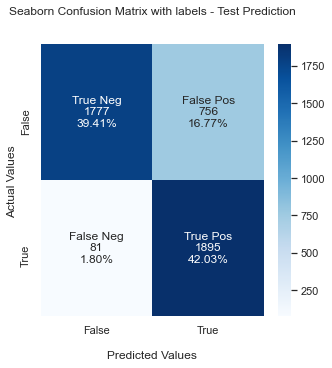

In [95]:
y_test_pred=MultinomialNB_model.predict(x_test1)
MN_NB_Case1_Test = accuracy_score(y_test_pred,y_test1)
print(accuracy_score(y_test_pred,y_test1))
ytest = np.array(y_test1)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

***classification report***

In [96]:
print(classification_report(y_test1, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      2533
           1       0.71      0.96      0.82      1976

    accuracy                           0.81      4509
   macro avg       0.84      0.83      0.81      4509
weighted avg       0.85      0.81      0.81      4509



### Case-2

In [97]:
mn_NB.fit(x_train2, y_train2)
MN_NB_Case2_alpha = mn_NB.best_estimator_.alpha
print('Best alpha',mn_NB.best_estimator_.alpha)
print('Best Accuracy',mn_NB.best_score_)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best alpha 0.0001
Best Accuracy 0.8339183706988583


0.8371783496007098
[[989 331]
 [ 36 898]]


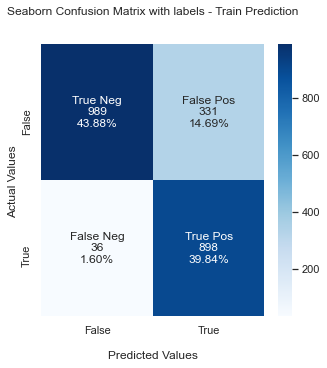

In [98]:
MultinomialNB_model_case2=MultinomialNB(alpha=0.0001)
MultinomialNB_model_case2=MultinomialNB_model_case2.fit(x_train2, y_train2)
y_train_pred=MultinomialNB_model_case2.predict(x_train2)
MN_NB_Case2_train = accuracy_score(y_train_pred,y_train2)
print(accuracy_score(y_train_pred,y_train2))
ytest = np.array(y_train2)
cf_matrix_test = confusion_matrix(ytest, y_train_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

0.8341795238329965
[[8546 2964]
 [ 400 8377]]


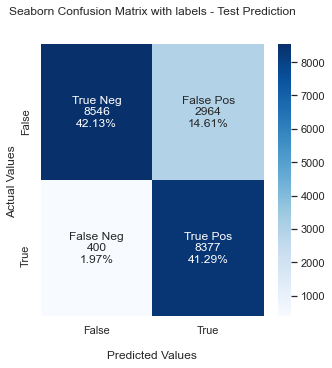

In [99]:
y_test_pred=MultinomialNB_model_case2.predict(x_test2)
MN_NB_Case2_Test = accuracy_score(y_test_pred,y_test2)
print(accuracy_score(y_test_pred,y_test2))
ytest = np.array(y_test2)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

***classification report***

In [100]:
print(classification_report(y_test2, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     11510
           1       0.74      0.95      0.83      8777

    accuracy                           0.83     20287
   macro avg       0.85      0.85      0.83     20287
weighted avg       0.86      0.83      0.83     20287



### With Regularization

#### Case-1

In [101]:
mn_NB.fit(x_train3, y_train3)
MN_NB_Regu_Case1_alpha = mn_NB.best_estimator_.alpha
print('Best alpha',mn_NB.best_estimator_.alpha)
print('Best Accuracy',mn_NB.best_score_)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best alpha 0.0001
Best Accuracy 0.8158640506281233


0.81627107364685
[[7284 3013]
 [ 300 7435]]


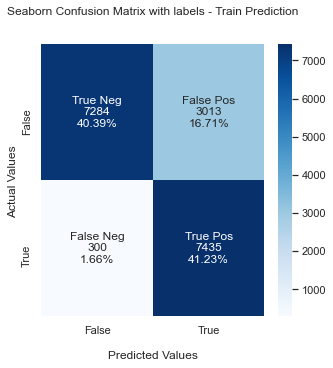

In [102]:
MultinomialNB_model=MultinomialNB(alpha=0.0001)
MultinomialNB_model=MultinomialNB_model.fit(x_train3, y_train3)
y_train_pred=MultinomialNB_model.predict(x_train3)
MN_NB_Regu_Case1_train = accuracy_score(y_train_pred,y_train3)
print(MN_NB_Regu_Case1_train)
ytest = np.array(y_train3)
cf_matrix_test = confusion_matrix(ytest, y_train_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

Predict label of test data from best mode

0.8143712574850299
[[1777  756]
 [  81 1895]]


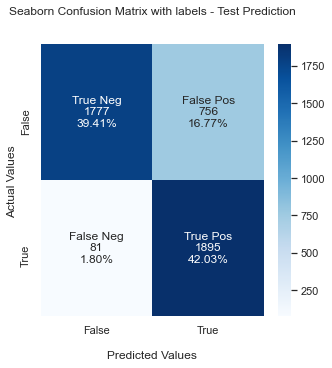

In [103]:
y_test_pred=MultinomialNB_model.predict(x_test3)
MN_NB_Regu_Case1_Test = accuracy_score(y_test_pred,y_test3)
print(MN_NB_Regu_Case1_Test)
ytest = np.array(y_test3)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

***classification report***

In [104]:
print(classification_report(y_test3, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81      2533
           1       0.71      0.96      0.82      1976

    accuracy                           0.81      4509
   macro avg       0.84      0.83      0.81      4509
weighted avg       0.85      0.81      0.81      4509



#### Case-2

In [105]:
mn_NB.fit(x_train4, y_train4)
MN_NB_Regu_Case2_alpha = mn_NB.best_estimator_.alpha
print('Best alpha',mn_NB.best_estimator_.alpha)
print('Best Accuracy',mn_NB.best_score_)

Fitting 15 folds for each of 6 candidates, totalling 90 fits
Best alpha 0.0001
Best Accuracy 0.8339183706988583


train the model on best parameter

0.8371783496007098
[[989 331]
 [ 36 898]]


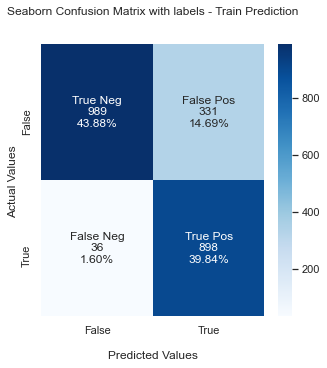

In [106]:
MultinomialNB_model_case2=MultinomialNB(alpha=0.0001)
MultinomialNB_model_case2=MultinomialNB_model_case2.fit(x_train4, y_train4)
y_train_pred=MultinomialNB_model_case2.predict(x_train4)
MN_NB_Regu_Case2_train = accuracy_score(y_train_pred,y_train4)
print(MN_NB_Regu_Case2_train)
ytest = np.array(y_train4)
cf_matrix_test = confusion_matrix(ytest, y_train_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Train Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

Check how modle work on test data and ploting the confusion matrix 

0.8341795238329965
[[8546 2964]
 [ 400 8377]]


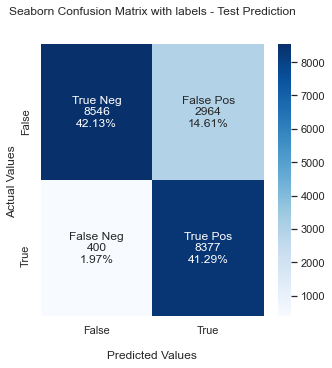

In [108]:
y_test_pred=MultinomialNB_model_case2.predict(x_test4)
MN_NB_Regu_Case2_Test = accuracy_score(y_test_pred,y_test4)
print(MN_NB_Regu_Case2_Test)
ytest = np.array(y_test4)
cf_matrix_test = confusion_matrix(ytest, y_test_pred)
print(cf_matrix_test)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_test.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_test.flatten()/np.sum(cf_matrix_test)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels - Test Prediction\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show() 

***classification report***

In [109]:
print(classification_report(y_test4, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84     11510
           1       0.74      0.95      0.83      8777

    accuracy                           0.83     20287
   macro avg       0.85      0.85      0.83     20287
weighted avg       0.86      0.83      0.83     20287



#4. Performance Evaluation

In [110]:
from prettytable import PrettyTable
 
x = PrettyTable()
x.field_names = ["Model","case", "Best Estimator", "Train Accuracy%", "Test Accuracy%"]
## GaussianNB
x.add_row(["GaussianNB Without Regularization",'Case-1', 0.0001232846739442066, 84.37,83.83])
x.add_row(["GaussianNB With Regularization",'Case-1', 0.0003511191734215131, 84.64,84.22])
x.add_row(["GaussianNB Without Regularization",'Case-2', 0.0001232846739442066, 84.37,83.83])
x.add_row(["GaussianNB With Regularization",'Case-2', 0.0003511191734215131, 84.64,84.22])
## BernoulliNB
x.add_row(["BernoulliNB Without Regularization",'Case-1', 0.0001, 85.34,85.91])
x.add_row(["BernoulliNB With Regularization",'Case-1', 0.0001, 85.09,85.53])
x.add_row(["BernoulliNB Without Regularization",'Case-2', 0.0001, 85.34,85.91])
x.add_row(["BernoulliNB With Regularization",'Case-2', 0.0001, 85.09,85.49])
## MultinomialNB
x.add_row(["MultinomialNB Without Regularization",'Case-1', 0.0001,81.62,81.43])
x.add_row(["MultinomialNB With Regularization",'Case-1', 0.0001, 83.71,83.41])
x.add_row(["MultinomialNB Without Regularization",'Case-2', 0.0001, 81.62,81.43])
x.add_row(["MultinomialNB With Regularization",'Case-2', 0.0001, 83.71,83.41])
print('Result of GaussianNB,BernoulliNB and # MultinomialNB With & Without Regularization ')
print(x)

Result of GaussianNB,BernoulliNB and # MultinomialNB With & Without Regularization 
+--------------------------------------+--------+-----------------------+-----------------+----------------+
|                Model                 |  case  |     Best Estimator    | Train Accuracy% | Test Accuracy% |
+--------------------------------------+--------+-----------------------+-----------------+----------------+
|  GaussianNB Without Regularization   | Case-1 | 0.0001232846739442066 |      84.37      |     83.83      |
|    GaussianNB With Regularization    | Case-1 | 0.0003511191734215131 |      84.64      |     84.22      |
|  GaussianNB Without Regularization   | Case-2 | 0.0001232846739442066 |      84.37      |     83.83      |
|    GaussianNB With Regularization    | Case-2 | 0.0003511191734215131 |      84.64      |     84.22      |
|  BernoulliNB Without Regularization  | Case-1 |         0.0001        |      85.34      |     85.91      |
|   BernoulliNB With Regularization    | Cas

**From Above table we can say that :**


*   GaussianNB With Regularization is model better than GaussianNB Without Regularization
*   BernoulliNB With Regularization is model better than BernoulliNB Without Regularization
*   MultinomialNB With Regularization is model better than MultinomialNB Without Regularization 



**Among all the above model GaussianNB With Regularization case-2 is the best model , MultinomialNB with & without Regularization have less accuracy , Where as BernoulliNB with & without Regularization is underfit modle because train acuracy is less than test accuracy in all the cases**

**From Above table we can say that :**


*   *GaussianNB With Regularization is right model as there is not much difference between train & test accuracy, whereas without regularization has train accuracy more than test accuracy and therefore need improvement*
*   *BernoulliNB With  & Without Regularization are underfit model as train accracy is less than test accuracy,this model need improvement*
*   *MultinomialNB With & Without Regularization are just right model as there is not much difference between train & test accuracy* 



We can further improve the model by creating few more features , we can also try PCA and other technique as after further increase in features may slow down the modle training performance  